In [9]:
using GynC

#scalings = [2.0 ^ (i * 5/15) for i in -15:12]
#cs = map(x->Config(propvar=x*GynC.defaultpropvar), scalings)

#cs = Config[Config(Lausanne(p), propvar=1/8*GynC.defaultpropvar, adapt=true, thin=100) for p in 1:55]

cs = Config[Config(Lausanne(p), propvar=GynC.uniformpropvar(v), adapt=true, thin=100) for p in 1:5, v in [0.1, 0.01, 0.001]][:]

paths = map(c->joinpath("/nfs/datanumerik/bzfsikor/batch/",GynC.filename(c)), cs)

ss = map(GynC.load, paths)

15-element Array{GynC.Sampling,1}:
 Sampling
  samples: (300000,116)
  uniques: 32748
  config:  Config:
 patient: l1
 sigma:   0.1
 proposal variance: 1.0 x default trace, 0.009950330853168092 top left
 adapt:   true
 thin:    100
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}                  
 Sampling
  samples: (300000,116)
  uniques: 33217
  config:  Config:
 patient: l2
 sigma:   0.1
 proposal variance: 1.0 x default trace, 0.009950330853168092 top left
 adapt:   true
 thin:    100
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMats.PDia

In [12]:
ssf = filter(s->s.config.patient.id=="l1",ss)
ssf

3-element Array{GynC.Sampling,1}:
 Sampling
  samples: (300000,116)
  uniques: 32748
  config:  Config:
 patient: l1
 sigma:   0.1
 proposal variance: 1.0 x default trace, 0.009950330853168092 top left
 adapt:   true
 thin:    100
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}                  
 Sampling
  samples: (300000,116)
  uniques: 36260
  config:  Config:
 patient: l1
 sigma:   0.1
 proposal variance: 0.010049414618355118 x default trace, 9.999500033329732e-5 top left
 adapt:   true
 thin:    100
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNo

In [50]:
import Mamba.Chains
function Mamba.Chains(ss::Vector{GynC.Sampling}; burnin=0)
    ml = minimum([size(s.samples,1) for s in ss])
    samples = cat(3, [s.samples[burnin+1:ml, :] for s in ss]...)
    Mamba.Chains(samples, thin=ss[1].config.thin, start=s.config.thin*(burnin+1))
end
Mamba.Chains(s::GynC.Sampling) = Mamba.Chains([s])

chains = Chains(ssf, burnin=1000)

Object of type "Mamba.Chains"

Iterations = 100100:25000000
Thinning interval = 100
Chains = 1,2,3
Samples per chain = 249000

249000x116x3 Array{Float64,3}:
[:, :, 1] =
  4698.16   9888.32  184.327  2.97576  …  5.50262e-5  1.53372e-5  29.7843
  4670.28   9464.74  180.202  3.08766     6.05924e-5  1.46112e-5  29.4688
  4589.55  10073.7   182.884  3.13261     5.8571e-5   1.35434e-5  29.4364
  4566.13  10120.7   182.424  3.15205     5.46224e-5  1.37568e-5  29.9296
  4484.77  10536.8   185.391  3.33307     5.24452e-5  1.3408e-5   29.9218
  4390.83  10689.6   180.335  3.3714   …  5.16556e-5  1.35687e-5  30.2726
  4390.83  10689.6   180.335  3.3714      5.16556e-5  1.35687e-5  30.2726
  4366.24  10580.5   180.406  3.3752      5.19254e-5  1.30908e-5  30.4879
  4366.24  10580.5   180.406  3.3752      5.19254e-5  1.30908e-5  30.4879
  4366.24  10580.5   180.406  3.3752      5.19254e-5  1.30908e-5  30.4879
  4366.24  10580.5   180.406  3.3752   …  5.19254e-5  1.30908e-5  30.4879
  4380.51  10961

In [51]:
Mamba.gelmandiag(Chains(ssf))

          PSRF  97.5%
  Param1 1.248  1.691
  Param2 1.036  1.095
  Param3 1.068  1.218
  Param4 1.517  2.834
  Param5 1.566  2.506
  Param6 1.740  2.780
  Param7 1.109  1.324
  Param8 2.232  4.341
  Param9 2.713  5.316
 Param10 1.325  1.958
 Param11 3.070  6.888
 Param12 1.395  2.130
 Param13 1.244  1.672
 Param14 1.182  1.517
 Param15 1.879  3.529
 Param16 1.410  2.139
 Param17 1.726  3.045
 Param18 1.324  2.013
 Param19 1.791  3.448
 Param20 1.177  1.561
 Param21 1.450  2.167
 Param22 1.271  1.736
 Param23 1.082  1.256
 Param24 1.267  1.767
 Param25 2.974  6.175
 Param26 1.619  2.683
 Param27 1.306  1.826
 Param28 1.567  2.627
 Param29 1.857  3.720
 Param30 1.085  1.267
 Param31 2.139  4.617
 Param32 2.277  4.450
 Param33 3.254 11.712
 Param34 2.680  5.605
 Param35 1.323  1.965
 Param36 1.479  2.342
 Param37 2.629  5.119
 Param38 2.017  3.371
 Param39 1.409  2.099
 Param40 3.613 10.013
 Param41 1.632  2.642
 Param42 1.998  3.890
 Param43 3.171  7.073
 Param44 2.131  4.148
 Param45 1


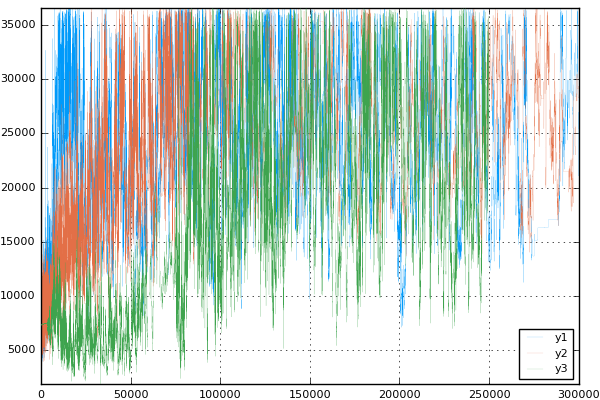

In [61]:
Plots.plot([s.samples[:,1] for s in ssf], width=0.1)

In [3]:
using ClusterManagers
rmprocs(workers())
slurm = addprocs(SlurmManager(20))
@everywhere using GynC
@time w = WeightedChain(ssf)
rmprocs(slurm)

1249.617907 seconds (56.01 M allocations: 5.945 GB, 0.09% gc time)


:ok

In [12]:
JLD.save("merged.jld", "w", w)

In [108]:
using Plots, KernelDensity
plotsize=(600, 400*0.8)
iters = 20

  cols = linspace(colorant"midnightblue",colorant"lightskyblue", iters+1)
  cols = colormap("Blues", 1+2*iters)[iters+1:end]
  #cols[1] = colorant"red"

for species in 8#1:82
  ww = deepcopy(w)
  plot(legend=:none, title=GynC.samplednames[species], size=plotsize)
  for i=1:iters+1
      if i%1 == 0
          data = ww.samples[:,species]
          k = kde(data, npoints = 1000, weights = ww.weights, bandwidth=KernelDensity.default_bandwidth(data)/1)
          plot!(k.x, k.density, color=cols[i])
      end
      #emiteration!(ww)
      euler_phih!(ww, 0.001)
  end
  plot!() |> display
end

LoadError: LoadError: InterruptException:
while loading In[108], in expression starting on line 9

In [74]:
for species in 1:3
    species
    end


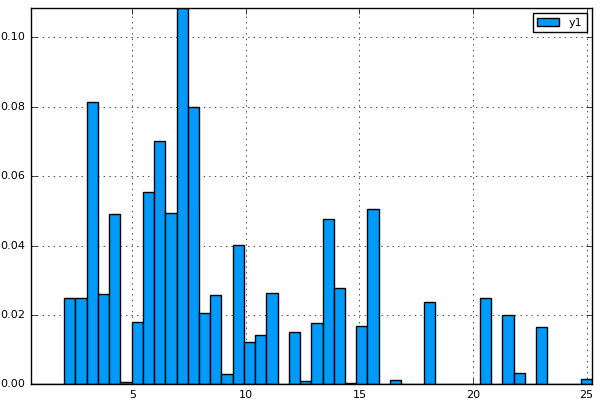

In [90]:
x, y = GynC.weightedhist(ww.samples[:,8], ww.weights, 50)

bar(x[1:end-1] + step(x),y)

In [110]:
euler_phih!(ww,0.1)

LoadError: LoadError: InterruptException:
while loading In[110], in expression starting on line 1